<a href="https://colab.research.google.com/github/microprediction/microblog/blob/main/HalloweenGambit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install getjson
!pip install elosports

In [28]:
# My New Year's resolution is to become the World's leading authority on 
# the  Halloween Gambit. This spreadsheet is intended to capture my conditional 
# bullet rating and ascertain whether or not playing this gambit really
# helps as much as I think it does. 
#
# You can follow my feeble efforts at https://twitch.tv/microprediction

from getjson import getjson
results=list()
import numpy as np 

HANDLE = 'PinIsMightier'
TIME_CONTROL = "60"

def game_score(game_result):
    if game_result in ['win']:
        return 1.0
    elif game_result in ['agreed','insufficient','repetition','timevsinsufficient']:
        return 0.5 
    elif game_result in ['timeout','resigned','checkmated','abandoned']:
        return 0.0
    else:
      print(game_result+' is not classified yet.') 
      return np.nan


WHITE_ELO_ADVANTAGE = 10
for year in range(2021,2022):
  print("year "+str(year))
  for month in range(1,13):
    url = 'https://api.chess.com/pub/player/'+HANDLE+'/games/'+str(year)+'/'+str(month).zfill(2) 
    data = getjson(url=url)
    if data.get('games'):
      for game in data['games']:
          if 'Halloween-Gambit' in game['pgn']:
             if game['time_control']==str(TIME_CONTROL):
                game_result = game['white']['result']
                score = game_score(game_result)
                rating = game['white']['rating']
                opp_rating = game['black']['rating']
                expected_score = 1/(10.0**((opp_rating-WHITE_ELO_ADVANTAGE-rating)/400)+1 )
                results.append( (opp_rating, score, expected_score) )
                print((opp_rating,score,game_result, expected_score))
     

year 2021
(1866, 1.0, 'win', 0.6571186864870786)
(1850, 1.0, 'win', 0.6007782458900109)
(2042, 1.0, 'win', 0.34029200585525193)
(2019, 1.0, 'win', 0.403370826694226)
(2017, 0.0, 'timeout', 0.3746486066924632)


Text(0, 0.5, 'Games')

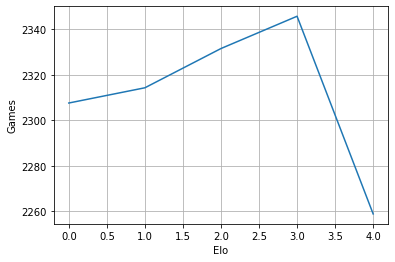

In [29]:
from elosports.elo import Elo
# Don't ask me why I'm importing this since Elo is so trivial but anyway...
eloLeague = Elo(k=100,homefield=0)
eloLeague.addPlayer("Me",rating=2300)
ratings = list()
edge = list()
for opp_rating, score, expected_score in results:
    eloLeague.addPlayer("Billy", rating=opp_rating)
    if score>0.9:
      eloLeague.gameOver(winner = "Me", loser = "Billy", winnerHome=True)
    elif score<0.1:
      eloLeague.gameOver(winner = "Billy", loser = "Me", winnerHome=False)
    ratings.append(eloLeague.ratingDict['Me'])
    edge.append(score-expected_score)
import matplotlib.pyplot as plt
plt.plot(ratings)
plt.grid()
plt.xlabel('Elo')
plt.ylabel('Games')

Text(0, 0.5, 'Extra games won')

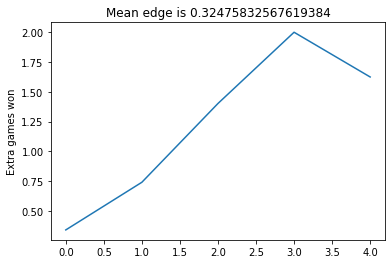

In [30]:
plt.plot(np.cumsum(edge))
plt.title('Mean edge is '+str(np.mean(edge)))
plt.ylabel('Extra games won')

In [32]:
import pandas as pd 
df = pd.DataFrame.from_records(results, columns=['opp_rating','score','expected_score'])
df[-10:]

,opp_rating,score,expected_score
0,1866,1.0,0.657119
1,1850,1.0,0.600778
2,2042,1.0,0.340292
3,2019,1.0,0.403371
4,2017,0.0,0.374649
